# General imports

In [1]:
from functions import *

# Setup workspace

In [2]:
dataset: list[str] = load_dataset(images_path)

model: any = load_model_resnet50()

dict_show_wrong_preds: dict[str, bool] = {
    "show_FGSM_wrong_preds": False,
    "show_IFGSM_wrong_preds": False,
    "show_PGD_wrong_preds": False
}

# Load and display performances on different iters

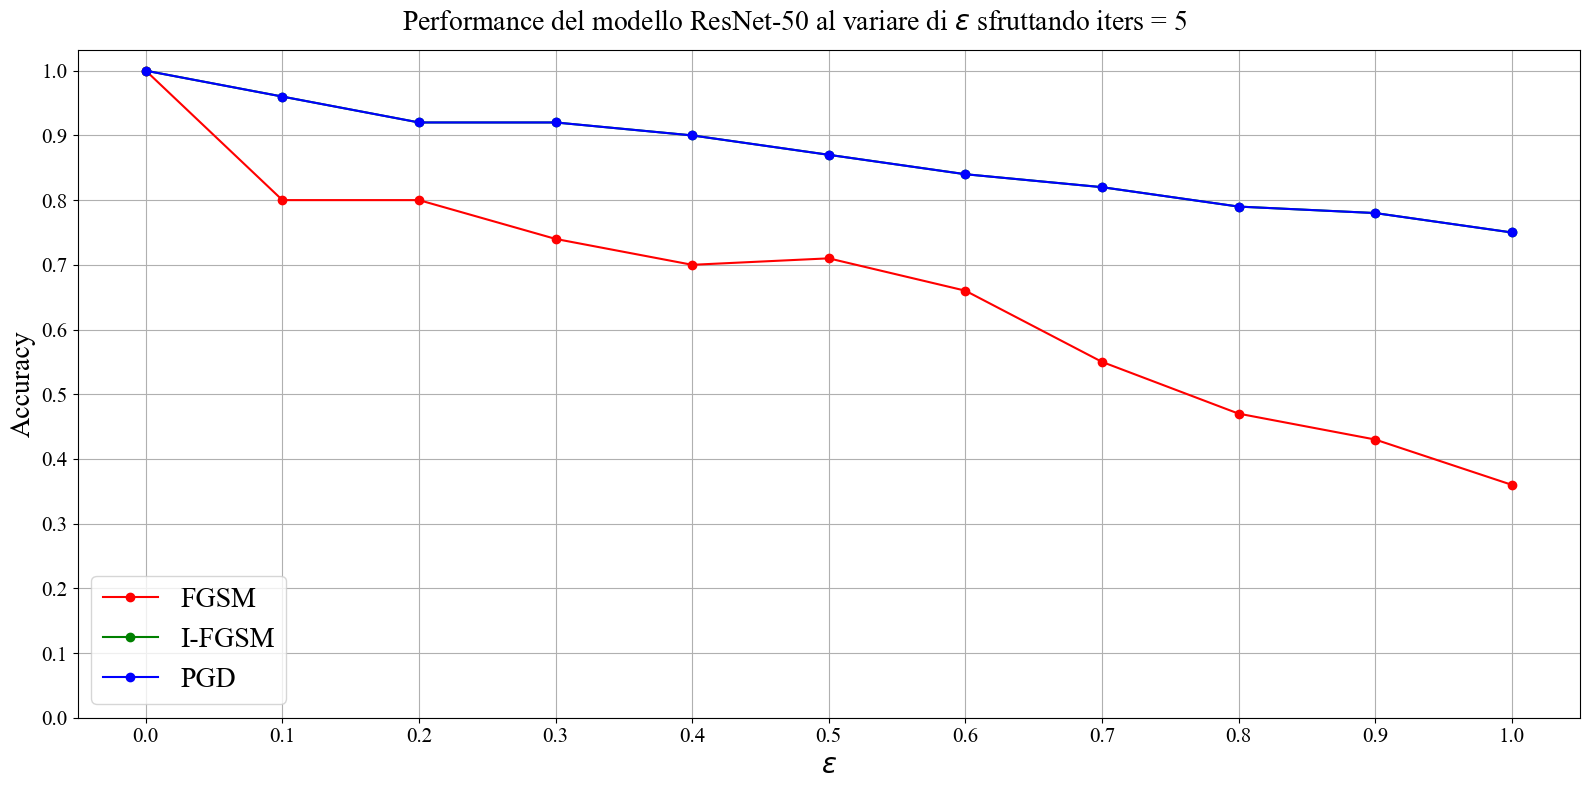

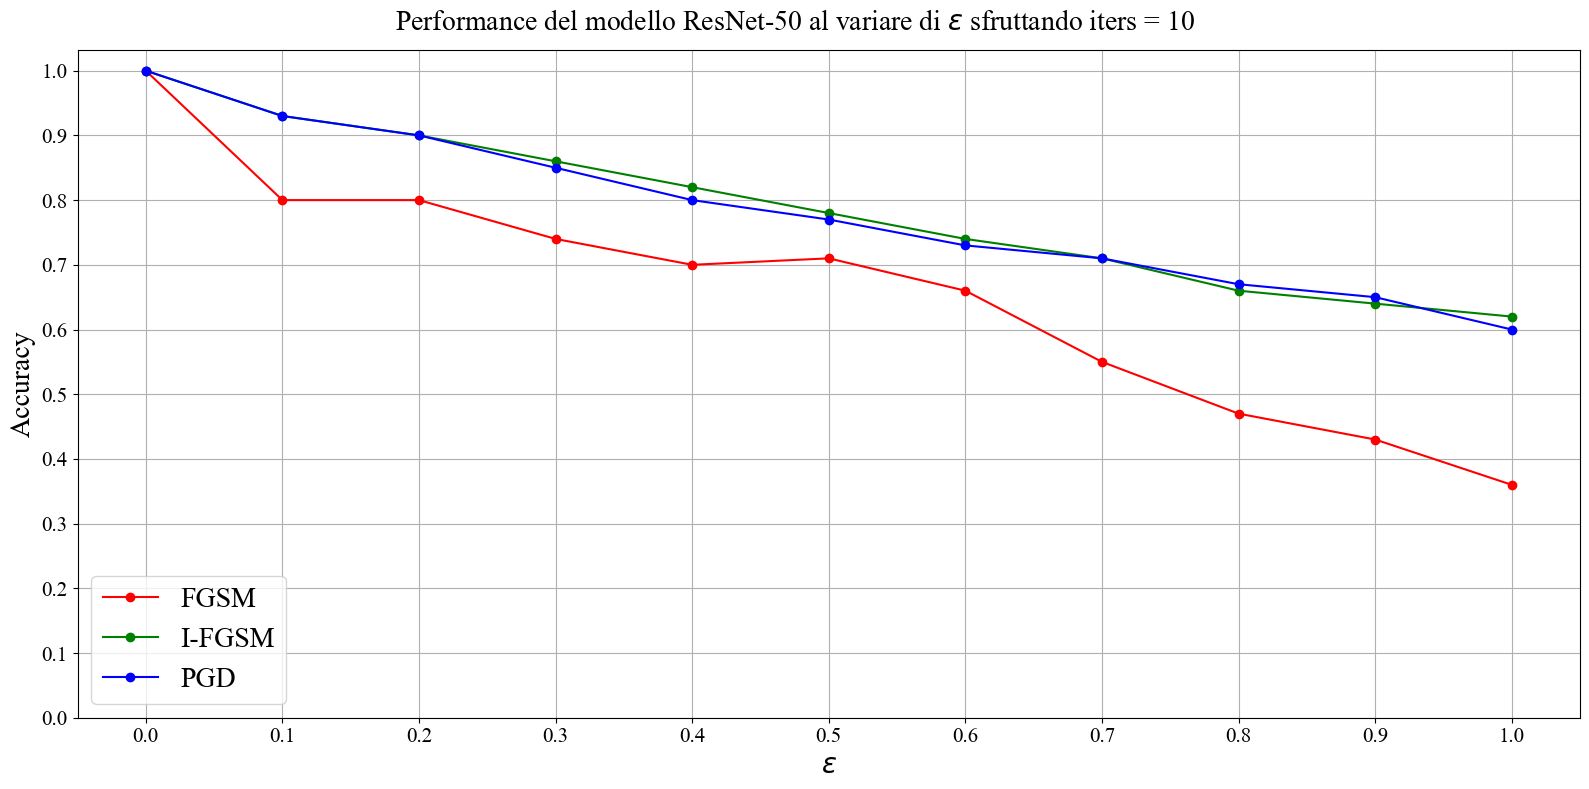

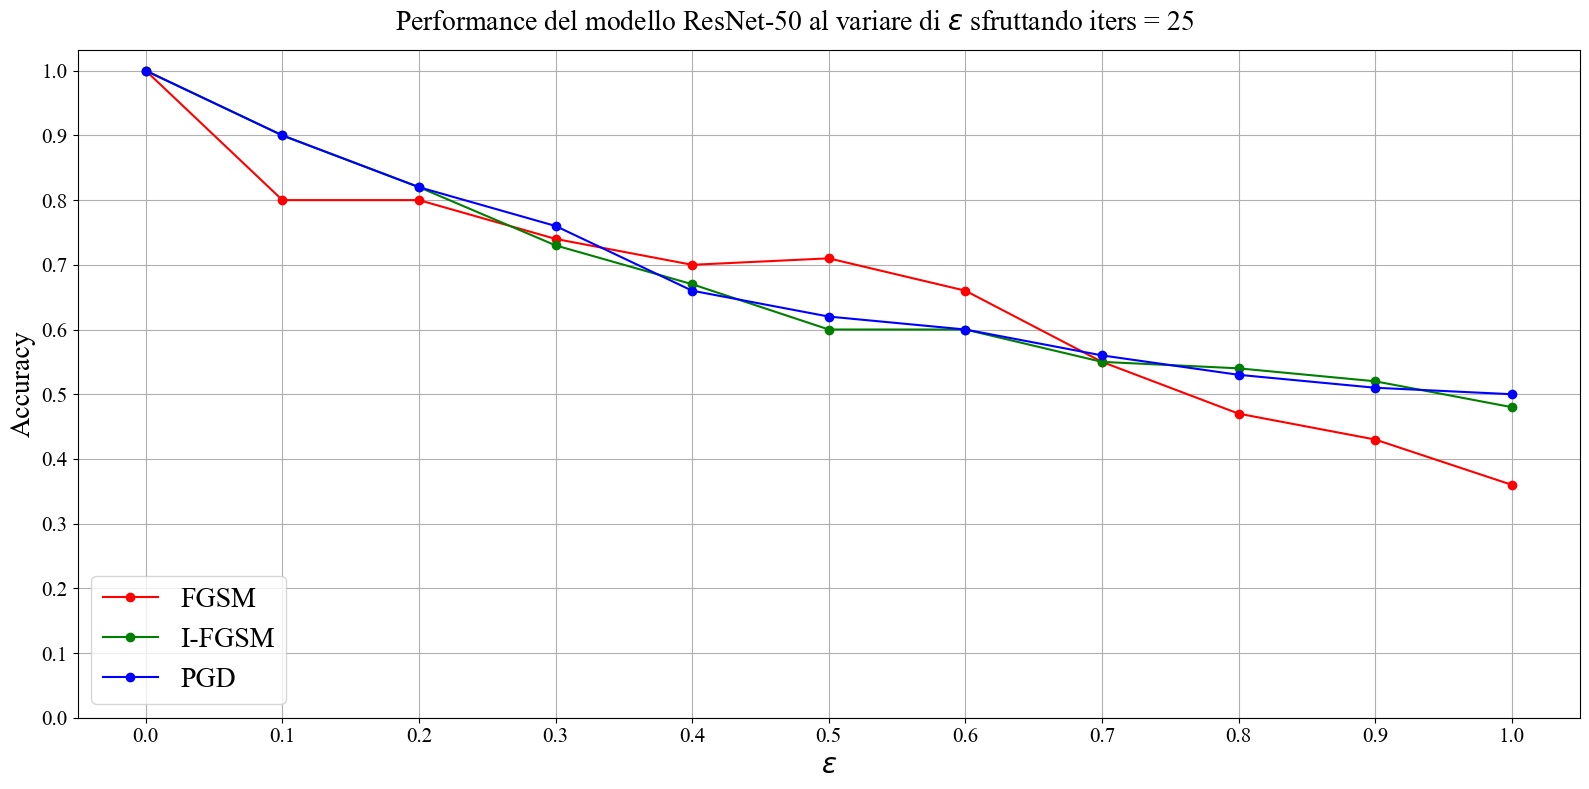

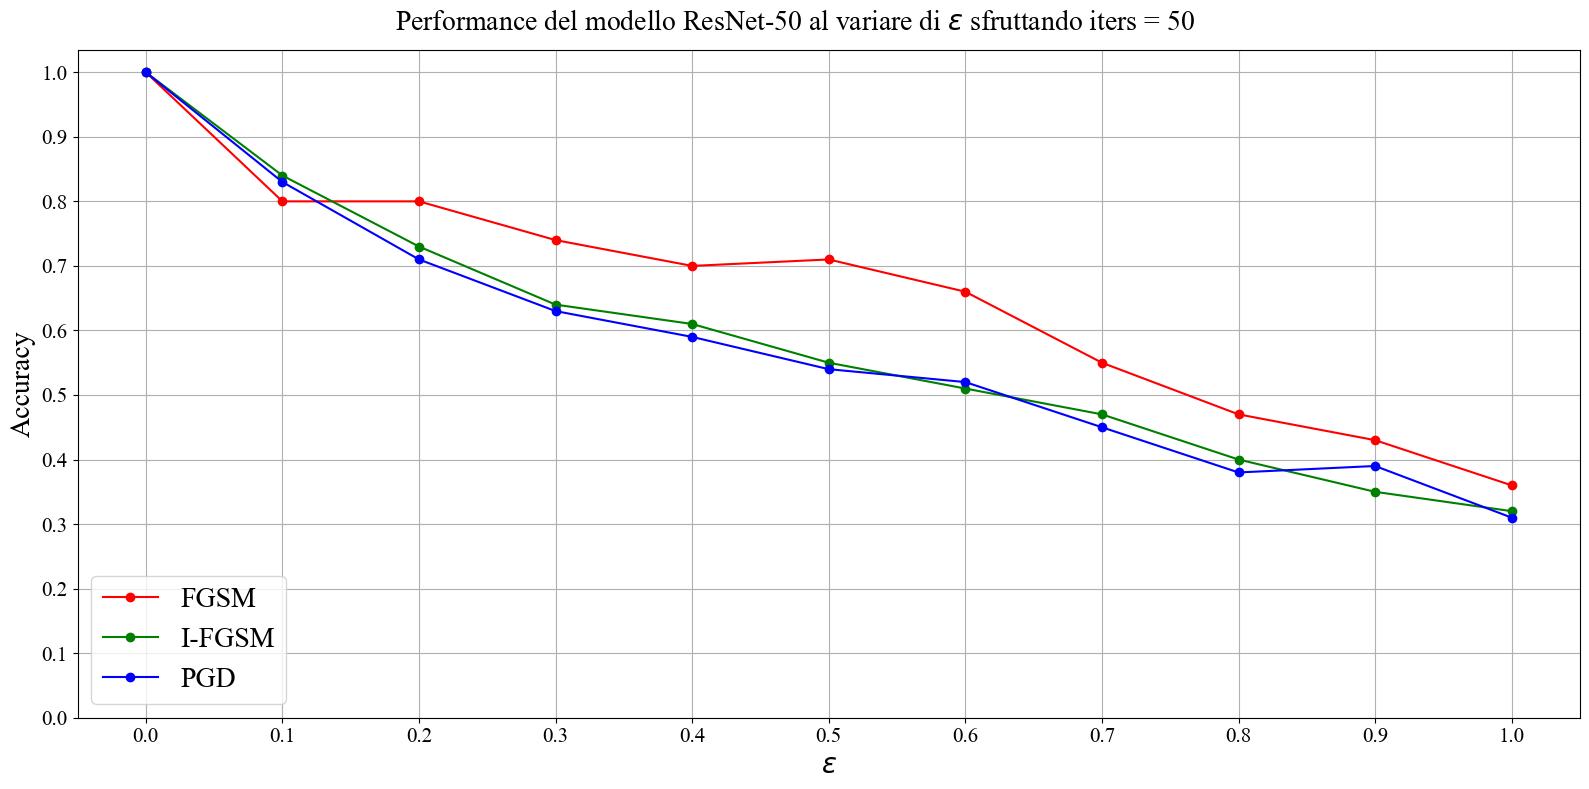

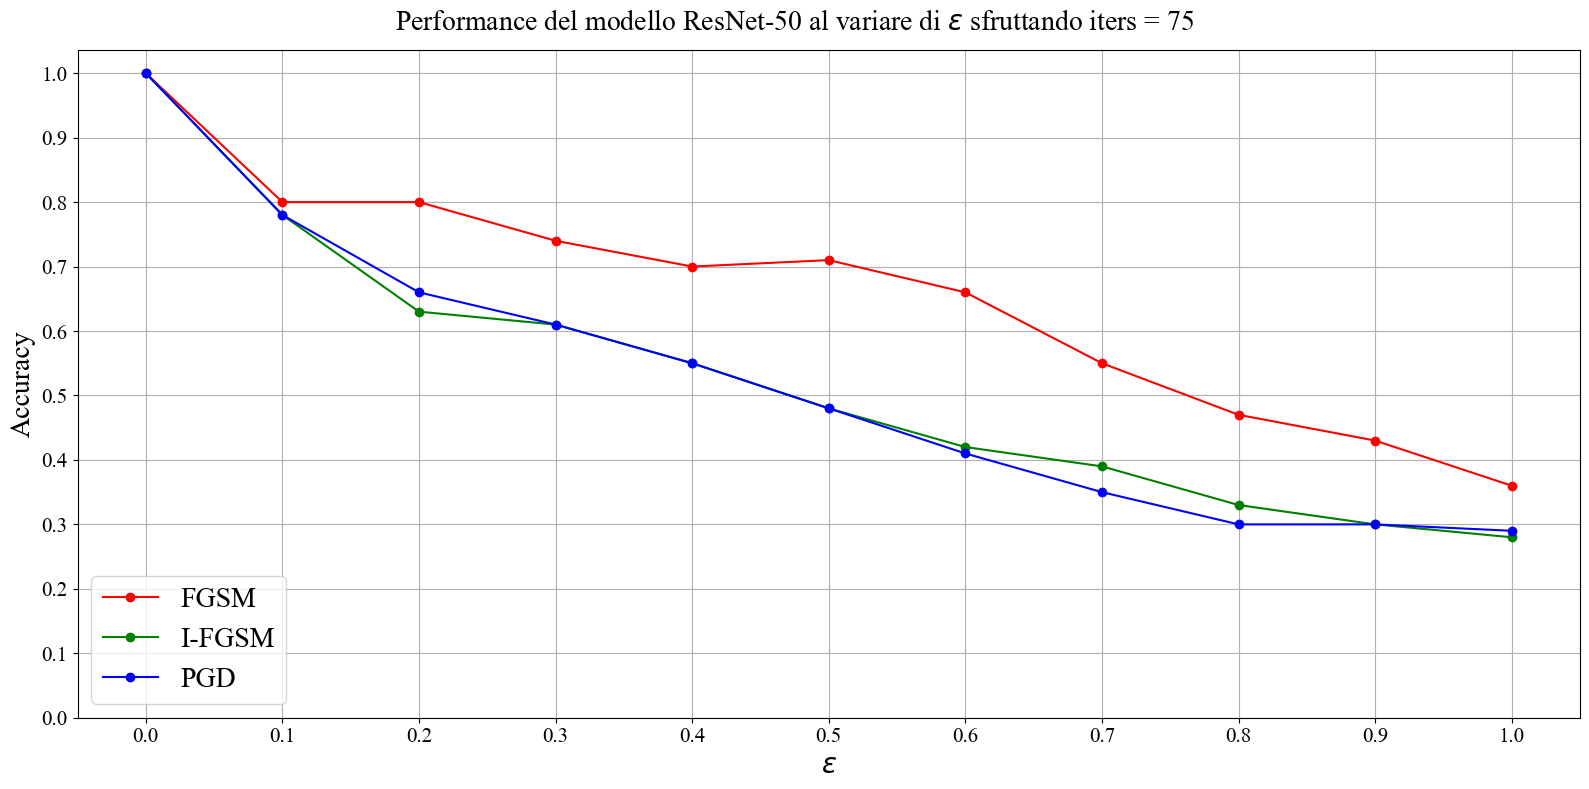

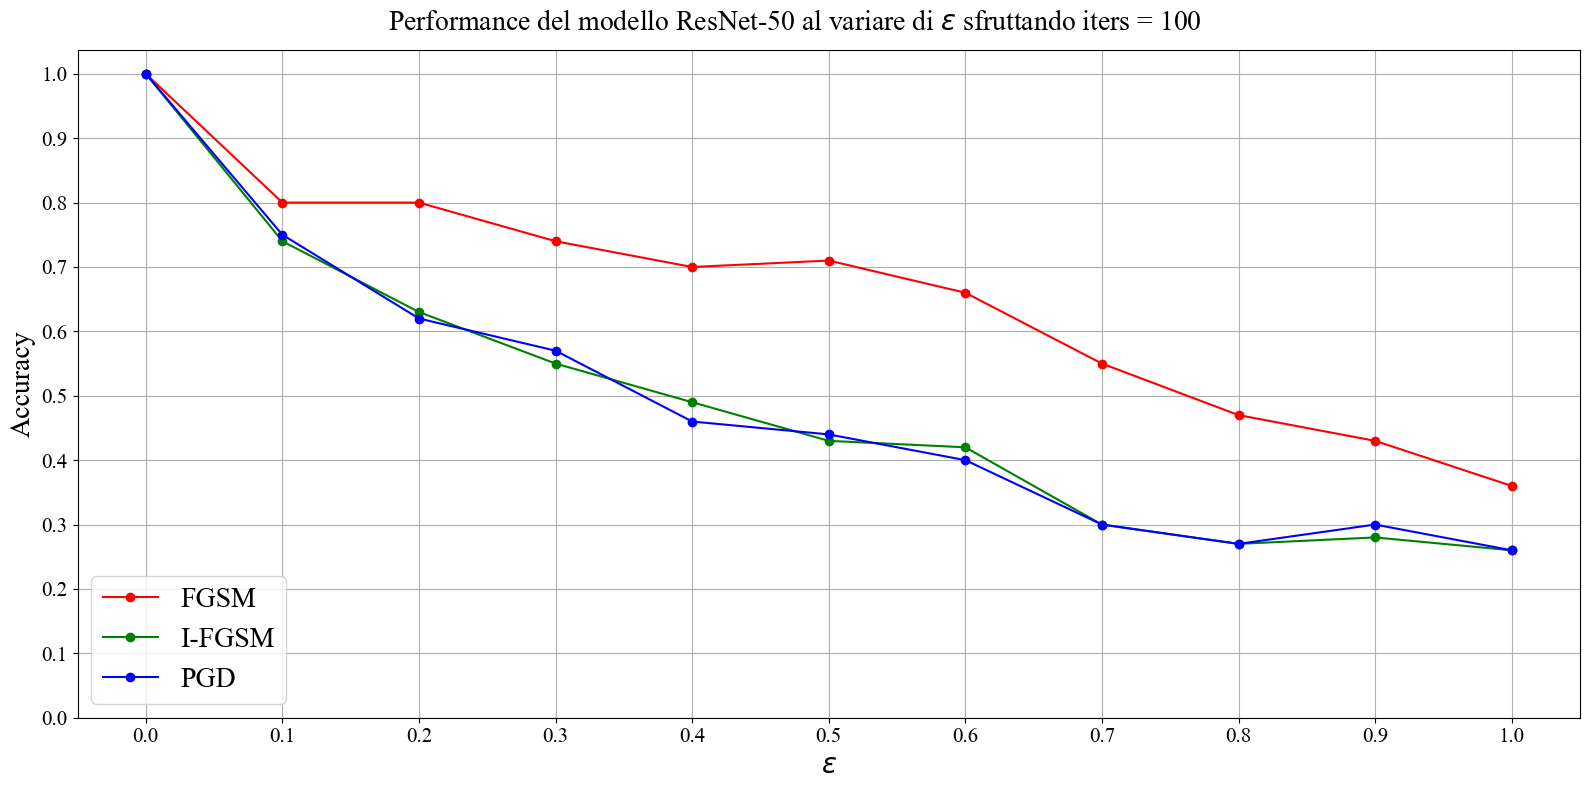

In [3]:
fgsm_accuracies: list[float] = np.loadtxt("res/fgsm_accuracies.txt", delimiter = " ").tolist()
fgsm_dict_wrong_preds: dict = torch.load("res/fgsm_dict_wrong_preds.pth")

for iter in iters:

    ifgsm_accuracies: list[float] = np.loadtxt(f"res/ifgsm_accuracies_{iter}iters.txt", delimiter = " ").tolist()
    ifgsm_dict_wrong_preds: dict = torch.load(f"res/ifgsm_dict_wrong_preds_{iter}iters.pth")

    pgd_accuracies: list[float] = np.loadtxt(f"res/pgd_accuracies_{iter}iters.txt", delimiter = " ").tolist()
    pgd_dict_wrong_preds: dict = torch.load(f"res/pgd_dict_wrong_preds_{iter}iters.pth")

    accuracies: tuple[list[float]] = (fgsm_accuracies, ifgsm_accuracies, pgd_accuracies)
    wrong_preds: tuple[dict] = (fgsm_dict_wrong_preds, ifgsm_dict_wrong_preds, pgd_dict_wrong_preds)
    
    accuracy_display(dataset, model, epsilons, accuracies, iter, wrong_preds, dict_show_wrong_preds)

    del iter, ifgsm_accuracies, ifgsm_dict_wrong_preds, pgd_accuracies, pgd_dict_wrong_preds, accuracies, wrong_preds

del dataset, model, dict_show_wrong_preds, fgsm_accuracies, fgsm_dict_wrong_preds